In [1]:
include("../../src/utilities.jl")
include("../../src/simple_canonical_model_functions.jl")
include("../../src/model_with_ribosomes_functions.jl")
include("../../src/canonical_two_stage_model_with_division_functions.jl")
using Catalyst, DifferentialEquations, PyPlot, Statistics, SpecialFunctions, Distributions

In [2]:
x = Array(0:0.1:10)

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

In [3]:
alpha = 10.0
gamma = 1.0
beta = 1.0
T = 10.0

10.0

In [4]:
y = CanonicalTwoStageModel.mrna(alpha, gamma, T, x)

101-element Vector{Float64}:
 4.999886497599093
 5.475710208600826
 5.9062533067039205
 6.295824811944728
 6.648323686887203
 6.967277858750731
 7.2558795280915245
 7.5170171174187175
 7.753304179497667
 7.967105554664489
 8.160561038942971
 8.33560679984241
 8.493994754172798
 ⋮
 9.99931803988712
 9.999382936972257
 9.999441658283212
 9.999494791522599
 9.99954286846574
 9.999586370282836
 9.9996257323547
 9.999661348630172
 9.99969357556891
 9.99972273570895
 9.999749120894773
 9.999772995198185

In [5]:
y_upper = y + sqrt.(y)
y_lower = y - sqrt.(y)

101-element Vector{Float64}:
 2.7638439001517425
 3.1356866598729876
 3.4759748644870783
 3.7866765875576696
 4.069889338898641
 4.327717694869118
 4.562205544831574
 4.775299203880069
 4.968828613166071
 5.1444993910872014
 5.303891467756452
 5.448461704797408
 5.5795488798816315
 ⋮
 6.837148208918657
 6.837202844540414
 6.837252280924036
 6.837297012837244
 6.83733748796533
 6.837374111391471
 6.837407249650713
 6.837437234398201
 6.837464365728341
 6.837488915178129
 6.8375111284446835
 6.837531227844179

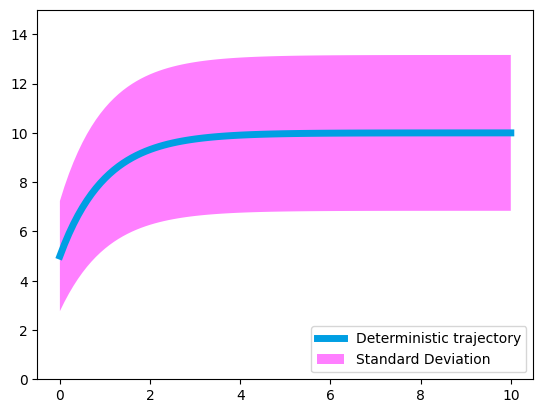

PyObject <matplotlib.legend.Legend object at 0x7f005357fcd0>

In [12]:
plot(x, y, label="Deterministic trajectory", color="#009fe3ff", linewidth=5)
fill_between(x, y_lower, y_upper, facecolor=:magenta, alpha=0.5, label="Standard Deviation")
ylim([0,15])
legend(loc="lower right")

In [14]:
sc2s = @reaction_network begin
        alpha,  0-->m
        gamma,  m-->0
end alpha gamma

Model ##ReactionSystem#291 with 2 equations
States (1):
  m(t)
Parameters (2):
  alpha
  gamma

In [15]:
function simulate_cycle(model, p, t0, t_fin, T, species_0)
    tstops = [t0+T:T:t_fin;]
    
    prob = DiscreteProblem(model, species_0, (t0,t_fin), p)
    jump_prob = JumpProblem(model, prob, Direct(), save_positions=(false,false))
        
    condition(u,t,integrator) = t%T==0.0
    affect!(integrator) = integrator.u = Utilities.partition_species(integrator.u)
    cb = DiscreteCallback(condition,affect!)
    
    sol = solve(jump_prob, SSAStepper(), saveat=0.01, callback=cb, tstops=tstops)
    return sol
end

simulate_cycle (generic function with 1 method)

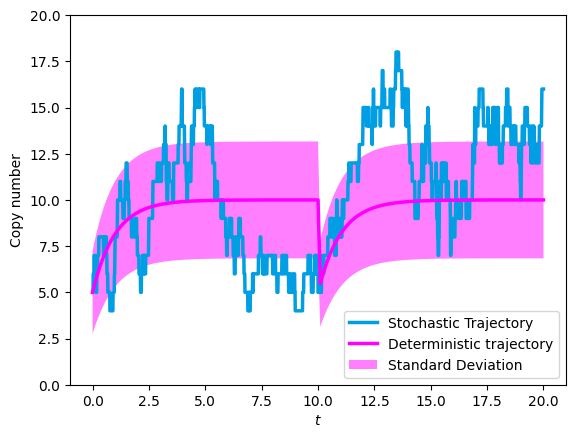

In [26]:
sol = simulate_cycle(sc2s, [alpha, gamma], 0.0, 20.0, 10.0,
        [
            round(0.5*alpha/gamma)
        ]
    )
    
t = sol.t
m = map(x -> x[1], sol.u)
plot(t, m, label="Stochastic Trajectory", linewidth=2.5, color="#009fe3ff")

    
t = sol.t
m = map(x -> x[1], sol.u)


xlabel(L"t")
ylabel("Copy number")
legend()
plot(0:0.1:20.0, vcat(y, y[2:length(y)]), label="Deterministic trajectory", color=:magenta, linewidth=2.5)
fill_between(0:0.1:20.0, vcat(y_lower, y_lower[2:length(y_lower)]), vcat(y_upper, y_upper[2:length(y_upper)]), facecolor=:magenta, alpha=0.5, label="Standard Deviation")
ylim([0,20])
legend(loc="lower right")
savefig("../../data/LNAExplanatoryTrajectory.svg")

In [10]:
vcat(y, y[2:length(y)])

201-element Vector{Float64}:
 4.999886497599093
 5.475710208600826
 5.9062533067039205
 6.295824811944728
 6.648323686887203
 6.967277858750731
 7.2558795280915245
 7.5170171174187175
 7.753304179497667
 7.967105554664489
 8.160561038942971
 8.33560679984241
 8.493994754172798
 ⋮
 9.99931803988712
 9.999382936972257
 9.999441658283212
 9.999494791522599
 9.99954286846574
 9.999586370282836
 9.9996257323547
 9.999661348630172
 9.99969357556891
 9.99972273570895
 9.999749120894773
 9.999772995198185

## Series Expansion

In [129]:
x = -2. * pi:0.1:2. * pi

-6.283185307179586:0.1:6.216814692820414

In [131]:
y = sin.(x)

126-element Array{Float64,1}:
  2.4492935982947064e-16
  0.09983341664682804
  0.19866933079506163
  0.29552020666133966
  0.389418342308651
  0.4794255386042032
  0.5646424733950353
  0.6442176872376913
  0.7173560908995228
  0.7833269096274837
  0.8414709848078966
  0.8912073600614353
  0.9320390859672265
  ⋮
 -0.9193285256646756
 -0.8754521746884284
 -0.8228285949687076
 -0.761983583919032
 -0.6935250847771222
 -0.6181371122370332
 -0.5365729180004347
 -0.44964746453459964
 -0.3582292822368268
 -0.2632317913658007
 -0.16560417544830916
 -0.06632189735120045

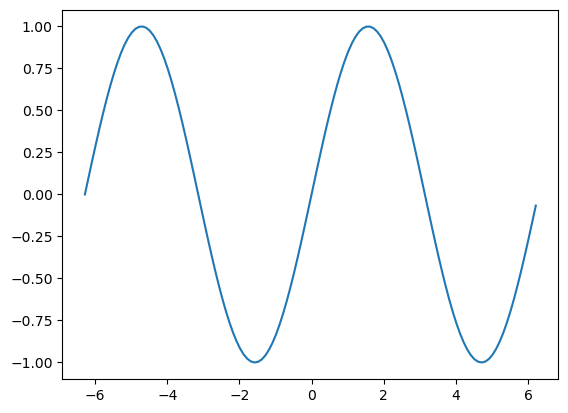

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffc3cc823d0>

In [132]:
plot(x, y)

In [152]:
y1 = x
y2 = x - x.^3/(3*2)
y3 = x - x.^3/(3*2) + x.^5/(5*4*3*2)

126-element Array{Float64,1}:
 -46.546732342854874
 -42.098909300610444
 -37.98329623803893
 -34.182083924134275
 -30.678071446421065
 -27.45465621095466
 -24.495823942321103
 -21.78613868363714
 -19.31073279655029
 -17.055296961238724
 -15.006070176411416
 -13.149829759307977
 -11.47388134569876
   ⋮
  12.018136067722157
  13.753331166989572
  15.673028964925315
  17.790100380033564
  20.117948012287904
  22.670516143131124
  25.462300735475356
  28.50835943370202
  31.824321563661684
  35.42639813267432
  39.3313918295292
  43.556707024484794

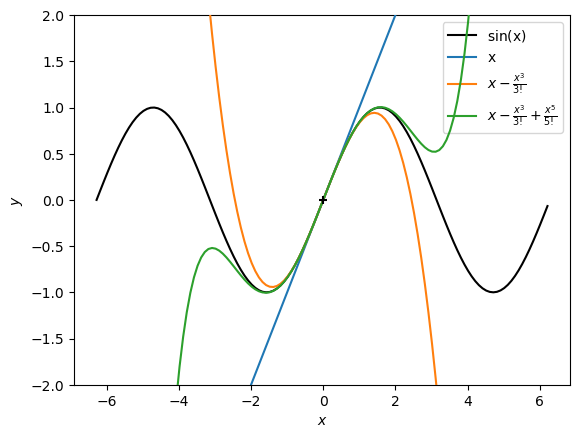

PyObject Text(25.0, 0.5, '$y$')

In [173]:
plot(x, y, label=L"\rm{sin}(x)", color="black", zorder=1)
plot(x, y1, label="x", zorder=3)
plot(x, y2, label=L"x - \frac{x^3}{3!}", zorder=5)
plot(x, y3, label=L"x - \frac{x^3}{3!} + \frac{x^5}{5!}", zorder=10)
ylim([-2, 2])
scatter([0], [0], marker="+", color="black", zorder=15)
legend()
xlabel(L"x")
ylabel(L"y")

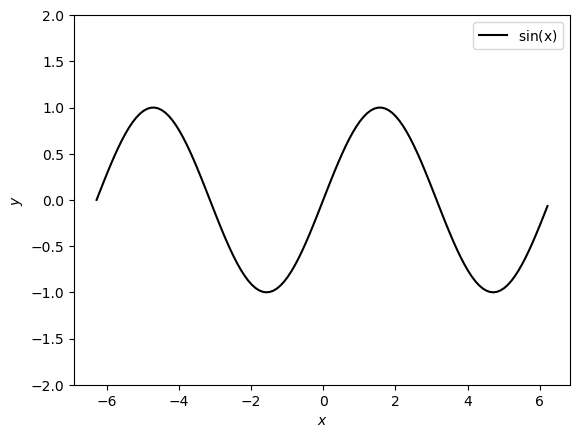

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [184]:
plot(x, y, label=L"\rm{sin}(x)", color="black")
legend()
ylim([-2, 2])
xlabel(L"x")
ylabel(L"y")
savefig("../../data/explanatory-figures/series-expansion-1.eps")

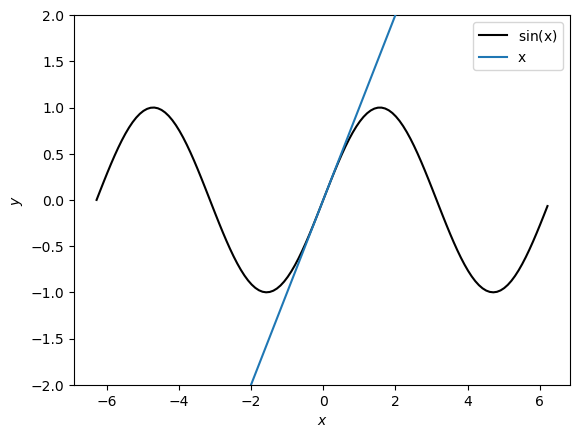

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [185]:
plot(x, y, label=L"\rm{sin}(x)", color="black")
plot(x, y1, label="x", zorder=3)
legend()
ylim([-2, 2])
xlabel(L"x")
ylabel(L"y")
savefig("../../data/explanatory-figures/series-expansion-2.eps")

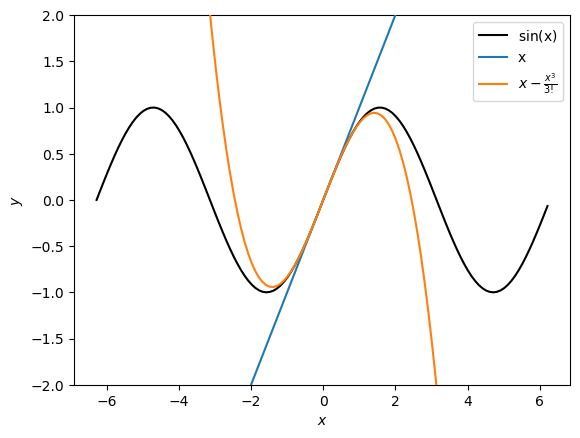

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [186]:
plot(x, y, label=L"\rm{sin}(x)", color="black")
plot(x, y1, label="x", zorder=3)
plot(x, y2, label=L"x - \frac{x^3}{3!}", zorder=5)
legend()
ylim([-2, 2])
xlabel(L"x")
ylabel(L"y")
savefig("../../data/explanatory-figures/series-expansion-3.eps")

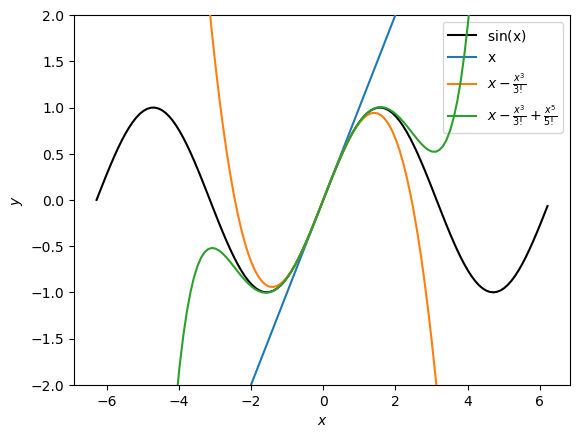

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [187]:
plot(x, y, label=L"\rm{sin}(x)", color="black")
plot(x, y1, label="x", zorder=3)
plot(x, y2, label=L"x - \frac{x^3}{3!}", zorder=5)
plot(x, y3, label=L"x - \frac{x^3}{3!} + \frac{x^5}{5!}", zorder=10)
legend()
ylim([-2, 2])
xlabel(L"x")
ylabel(L"y")
savefig("../../data/explanatory-figures/series-expansion-4.eps")

## Generating Functions

11-element Vector{Int64}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [63]:
p = 0.5
q = 0.5
n = 20
x = Vector(0:n)
y = binomial.(n, x) .* p.^x .* q.^(n .- x)

21-element Vector{Float64}:
 9.5367431640625e-7
 1.9073486328125e-5
 0.0001811981201171875
 0.001087188720703125
 0.004620552062988281
 0.0147857666015625
 0.03696441650390625
 0.0739288330078125
 0.12013435363769531
 0.16017913818359375
 0.17619705200195312
 0.16017913818359375
 0.12013435363769531
 0.0739288330078125
 0.03696441650390625
 0.0147857666015625
 0.004620552062988281
 0.001087188720703125
 0.0001811981201171875
 1.9073486328125e-5
 9.5367431640625e-7

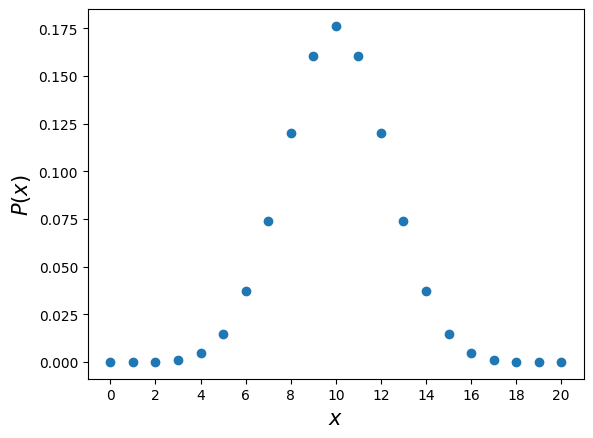

In [74]:
scatter(x, y)
xlabel(L"x", fontsize=15)
ylabel(L"P(x)", fontsize=15)
xticks(0:2:20)
savefig("../../data/explanatory-figures/binomial.png")

In [75]:
z = Vector(0:0.01:1)

101-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 0.89
 0.9
 0.91
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0

In [76]:
G = (q .+ p .* z) .^ n

101-element Vector{Float64}:
 9.5367431640625e-7
 1.1636639022330923e-6
 1.4171098670753049e-6
 1.7224418970770023e-6
 2.0896178655943115e-6
 2.5303818751758787e-6
 3.0585627290848236e-6
 3.690418684469398e-6
 4.4450351179593165e-6
 5.344782607820797e-6
 6.4158439152961835e-6
 7.688819442872195e-6
 9.19942197158332e-6
 ⋮
 0.32257905862429376
 0.35848592240854193
 0.3981689883260313
 0.4420024338794074
 0.4903952634930588
 0.543794342926747
 0.6026876802191001
 0.6676079717550942
 0.7391364333471016
 0.8179069375972308
 0.9046104802746175
 1.0

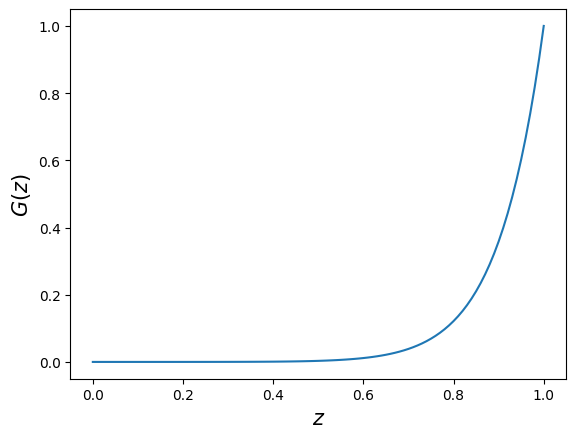

In [77]:
plot(z, G)
xlabel(L"z", fontsize=15)
ylabel(L"G(z)", fontsize=15)
savefig("../../data/explanatory-figures/binomial-generating-function.png")

# Explanation of Mathematical Modelling

In [2]:
rn = @reaction_network begin
        a,  0-->m
        b,  m-->0
        c, m-->p+m
        d, p-->0
end a b c d

Model ##ReactionSystem#253 with 4 equations
States (2):
  m(t)
  p(t)
Parameters (4):
  a
  b
  c
  d

In [3]:
a = 1.0
b = 0.1
c = 0.4
d = 0.2
prob = DiscreteProblem(rn, [0,0], (0.,50.), [a,b,c,d])
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false,false))

sol1 = solve(jump_prob, SSAStepper(), saveat=0.01)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 5001-element Array{Float64,1}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
 49.89
 49.9
 49.91
 49.92
 49.93
 49.94
 49.95
 49.96
 49.97
 49.98
 49.99
 50.0
u: 5001-element Array{Array{Int64,1},1}:
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 ⋮
 [12, 27]
 [12, 27]
 [12, 27]
 [12, 26]
 [12, 26]
 [12, 26]
 [12, 26]
 [12, 26]
 [12, 26]
 [12, 26]
 [12, 26]
 [12, 26]

In [53]:
using Plots; 
x_det = 0:0.1:50
y_det_m = a / b .*(1 .- exp.(-b*x_det))
y_det_p = a*c/b .* (exp.(-b*x_det) ./(b-d) .+ 1/d - b/(d*(b-d))*exp.(-d * x_det))
Plots.plot(x_det, y_det_m, label="mRNA", linewidth=2.5, xlabel="t", ylabel="Copy number", xlim=(0,50), ylim=(0,30), grid=false, dpi=600, size=(600,400))
Plots.plot!(x_det, y_det_p, label="protein", linewidth=2.5, grid=false, dpi=600, size=(600,400))
Plots.savefig("../../data/explanatory-figures/modelling_deterministic_eq.png")

In [52]:
Plots.plot(x_det, y_det_m, label="mRNA", linewidth=3.5, xlabel=L"t", ylabel="Copy number", xlim=(0,50), ylim=(0,30), grid=false, dpi=600, size=(600,400))
Plots.plot!(x_det, y_det_p, label="protein", linewidth=3.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol1, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.savefig("../../data/explanatory-figures/modelling_one_stochastic_traj.png")

In [49]:
sol2 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol3 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol4 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol5 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol6 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol7 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol8 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol9 = solve(jump_prob, SSAStepper(), saveat=0.01)
sol10 = solve(jump_prob, SSAStepper(), saveat=0.01)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 5001-element Array{Float64,1}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
 49.89
 49.9
 49.91
 49.92
 49.93
 49.94
 49.95
 49.96
 49.97
 49.98
 49.99
 50.0
u: 5001-element Array{Array{Int64,1},1}:
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 [0, 0]
 ⋮
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]
 [16, 31]

In [50]:
Plots.plot(x_det, y_det_m, label="mRNA", linewidth=3.5, xlabel=L"t", ylabel="Copy number", xlim=(0,50), ylim=(0,30), grid=false, dpi=600, size=(600,400))
Plots.plot!(x_det, y_det_p, label="protein", linewidth=3.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol1, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol2, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.savefig("../../data/explanatory-figures/modelling_two_stochastic_traj.png")

In [51]:
Plots.plot(x_det, y_det_m, label="mRNA", linewidth=3.5, xlabel=L"t", ylabel="Copy number", xlim=(0,50), ylim=(0,30), grid=false, dpi=600, size=(600,400))
Plots.plot!(x_det, y_det_p, label="protein", linewidth=3.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol1, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol2, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol3, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol4, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol5, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol6, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.plot!(sol7, label=false, color=[1 2], alpha=0.3, linewidth=1.5, grid=false, dpi=600, size=(600,400))
Plots.savefig("../../data/explanatory-figures/modelling_many_stochastic_traj.png")